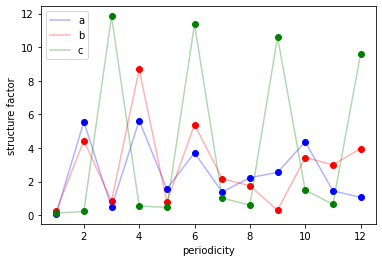

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PyLRO import pylro
def structure_factor(pos, hkl):
    """ N*1 array"""
    F = 0
    h, k, l = hkl
    for xyz in pos:
        x,y,z = xyz
        F += np.exp(-2*np.pi*(1j)*(h*x + k*y+ l*z))

    return F
#Load a structure and fit the sublattice
###################################
#Put file info here#
file='../../S812/POSCAR.201' 
n=13
###################################


amor=pylro(file,n)
amor.lattice_fit()

pmax=13
stest=range(1,13)
a=[]
b=[]
c=[]
basis=np.array([[1,0,0,],
       [0,1,0],
       [0,0,1]])
abc=[]
for b in basis:
    s=[]
    for i in stest:
        factor=np.abs(structure_factor(amor.atom_locations,b*i))
        s.append(factor)
    abc.append(s)
    
fig=plt.figure()
plt.plot(stest,abc[0],label='a',color='b',alpha=.3)
plt.plot(stest,abc[1],label='b',color='r',alpha=.3)
plt.plot(stest,abc[2],label='c',color='g',alpha=.3)
plt.scatter(stest,abc[0],color='b')
plt.scatter(stest,abc[1],color='r')
plt.scatter(stest,abc[2],color='g')
plt.legend()
plt.ylabel('structure factor')
plt.xlabel('periodicity')
plt.show()







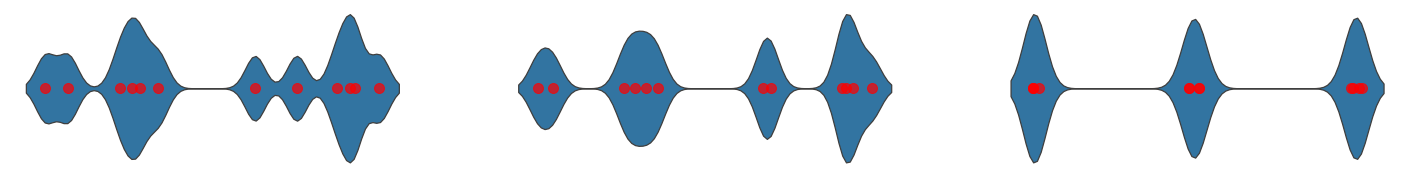

a:  0.15833546050000008
b:  0.1091502987222222
c:  0.024076789791666626


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PyLRO import pylro
#Load a structure and fit the sublattice

###################################
#Put file info here#
file='../../S812/POSCAR.201' 
n=13
###################################


amor=pylro(file,n)
amor.lattice_fit()



#Create 3 subfigures to display each dimension
#Use pylro.x : pylro.y : pylro.z to get the xyz atomic locations of the atoms
fig=plt.figure(figsize=(25,3))

ax1=fig.add_subplot(131)
ax1=sns.violinplot(x=amor.x,bw_method=.08,inner=None)
ax1.scatter(amor.x,np.zeros(len(amor.x)),alpha=.7,color='r',s=100)
ax1.axis('off')



ax2=fig.add_subplot(132)
ax2=sns.violinplot(x=amor.y,bw_method=.08,inner=None)
ax2.scatter(amor.y,np.zeros(len(amor.y)),alpha=.7,color='r',s=100)
ax2.axis('off')


ax3=fig.add_subplot(133)
ax3=sns.violinplot(x=amor.z,bw_method=.08,inner=None)
ax3.scatter(amor.z,np.zeros(len(amor.z)),alpha=.7,color='r',s=100)
ax3.axis('off')

plt.show()

print('a: ',amor.plane_order([1,0,0]))
print('b: ',amor.plane_order([0,1,0]))
print('c: ',amor.plane_order([0,0,1]))


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PyLRO import pylro
#Load a structure and fit the sublattice

###################################
#Put file info here#
file='../../S812/POSCAR.201' 
n=13
###################################


amor=pylro(file,n)
amor.lattice_fit()
print('Cell Dimensions: ',amor.dimensions)

a,b,c=amor.atom_locations.T

la,lb,lc=amor.lattice_repr.T

print('a           :     sorted_a')
for i in range(len(a)):
    idx=np.argsort(a)
    print(la[i],np.round(a[i],3),'    :    ',la[idx[i]],np.round(a[idx[i]],3))
    
print('\nb           :     sorted_b')
for i in range(len(b)):
    idx=np.argsort(b)
    print(lb[i],np.round(b[i],3),'    :    ',lb[idx[i]],np.round(b[idx[i]],3))
    
print('\nc           :     sorted_c')
for i in range(len(c)):
    idx=np.argsort(c)
    print(lc[i],np.round(c[i],3),'    :    ',lc[idx[i]],np.round(c[idx[i]],3))

Cell Dimensions:  [4, 4, 3]
a           :     sorted_a
2 0.187     :     1 0.016
2 0.215     :     1 0.068
4 0.685     :     2 0.187
4 0.716     :     2 0.215
1 0.016     :     2 0.234
1 0.068     :     2 0.276
2 0.234     :     3 0.497
2 0.276     :     3 0.593
3 0.497     :     4 0.685
3 0.593     :     4 0.716
4 0.727     :     4 0.727
4 0.783     :     4 0.783

b           :     sorted_b
4 0.782     :     1 0.006
2 0.285     :     1 0.041
4 0.713     :     2 0.206
2 0.206     :     2 0.232
4 0.739     :     2 0.259
2 0.259     :     2 0.285
3 0.548     :     3 0.53
1 0.041     :     3 0.548
4 0.723     :     4 0.713
2 0.232     :     4 0.723
3 0.53     :     4 0.739
1 0.006     :     4 0.782

c           :     sorted_c
1 0.246     :     1 0.245
1 0.258     :     1 0.246
1 0.245     :     1 0.246
1 0.246     :     1 0.258
3 0.909     :     2 0.572
3 0.914     :     2 0.572
2 0.572     :     2 0.591
2 0.591     :     2 0.593
3 0.926     :     3 0.909
3 0.932     :     3 0.914
2 0.572

In [4]:
%matplotlib qt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PyLRO import pylro


#Load a structure and fit the sublattice

###################################
#Put file info here#
file='../../S812/POSCAR.201' 

n=13
###################################


amor=pylro(file,n)
amor.lattice_fit()

ax = plt.figure(figsize=(20,10)).add_subplot(projection='3d')
ax.scatter(amor.x,amor.y,amor.z,color='r',s=200)
ax.scatter(amor.x_,amor.y_,amor.z_,color='k',s=25)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
plt.show()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PyLRO import pylro


#Load a structure and fit the sublattice

###################################
#Put file info here#
file='../../S812/POSCAR.201' 
n=13
###################################


amor=pylro(file,n)
amor.lattice_fit()

print('Find the lattice parameter along a')
cell=np.array(amor.cell)
a=cell[0]
print('a:',a)

print('\nThe a component of each atom\'s sublattice position')
print(amor.x_)

print('\nNow in angstroms')
angs=[np.linalg.norm(x*a) for x in amor.x_]
angs=[np.round(x,3) for x in angs]
print(angs)

print('\nThe first non-zero number represents the angstrom distance along a between two nearest lattices points.')
print('This is the Lattice parameter.')
angs=np.array(angs)
print(np.min(angs[angs>0.]))

Find the lattice parameter along a
a: [9.074398 0.       0.      ]

The a component of each atom's sublattice position
[0.255807   0.255807   0.76742099 0.76742099 0.         0.
 0.255807   0.255807   0.51161399 0.51161399 0.76742099 0.76742099]

Now in angstroms
[2.321, 2.321, 6.964, 6.964, 0.0, 0.0, 2.321, 2.321, 4.643, 4.643, 6.964, 6.964]

The first non-zero number represents the angstrom distance along a between two nearest lattices points.
This is the Lattice parameter.
2.321
